In [2]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#loading data
df = pd.read_csv(r"D:\مشاريع\archive_4\heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [18]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [20]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [21]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
df.columns.tolist()

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [5]:
#splitting data(features)
x=df.drop(columns=["DEATH_EVENT"])

In [6]:
#(label or target)
y=df["DEATH_EVENT"]

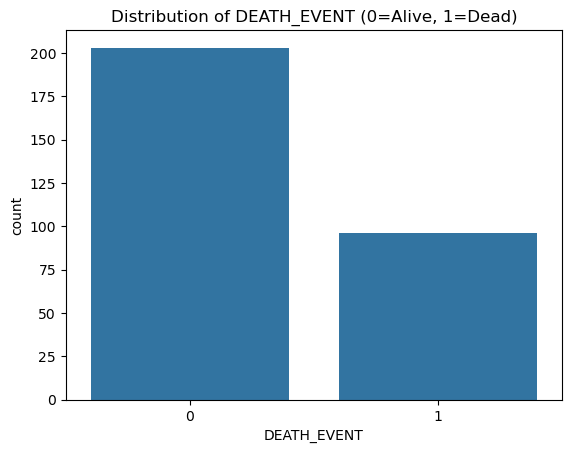

In [7]:
#(EDA)
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of DEATH_EVENT (0=Alive, 1=Dead)')
plt.show()

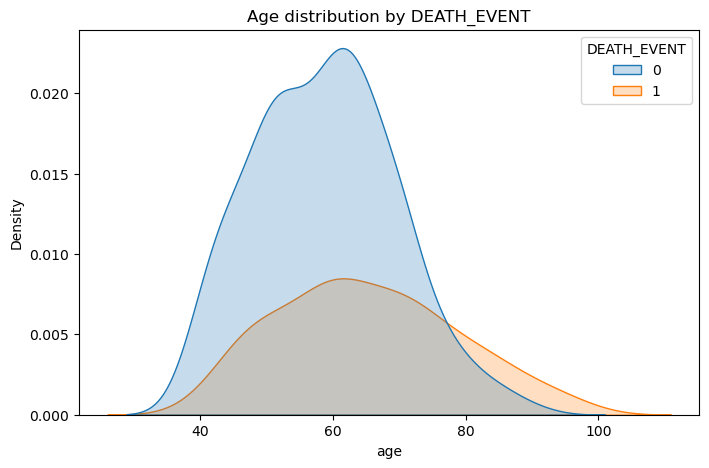

In [8]:
# age
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='age', hue='DEATH_EVENT', fill=True)
plt.title('Age distribution by DEATH_EVENT')
plt.show()


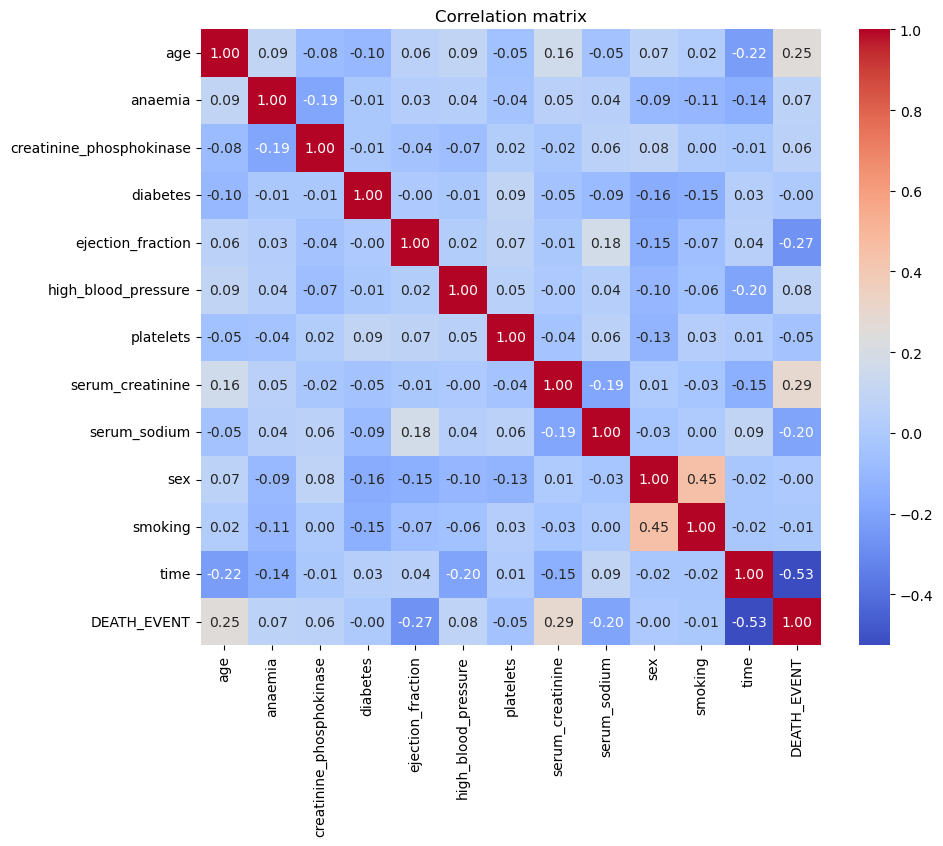

In [9]:
#  heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


In [10]:
#splitting to train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [48]:
# Scaling
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [49]:
x_train_sc

array([[ 1.16420244,  1.13933179, -0.35037003, ...,  0.74293206,
        -0.67625223, -1.56416577],
       [ 1.16420244, -0.87770745, -0.50593309, ...,  0.74293206,
        -0.67625223,  0.37989712],
       [-0.03281933,  1.13933179, -0.50064183, ...,  0.74293206,
        -0.67625223,  0.4950061 ],
       ...,
       [-0.50609935, -0.87770745,  0.18087256, ...,  0.74293206,
        -0.67625223, -0.56655455],
       [-1.42476533, -0.87770745,  0.0052027 , ...,  0.74293206,
         1.4787382 ,  1.42866789],
       [ 1.58177789, -0.87770745,  0.33961039, ...,  0.74293206,
         1.4787382 , -0.57934444]])

In [50]:
x_test_sc

array([[ 7.46626996e-01, -8.77707451e-01,  5.20270419e-03,
        -8.26497787e-01,  1.49345268e-01, -7.36162675e-01,
        -2.24743345e+00,  1.32203359e+00, -9.44310219e-02,
         7.42932064e-01,  1.47873820e+00,  1.50540721e+00],
       [-9.23674793e-01,  1.13933179e+00, -2.95340912e-01,
        -8.26497787e-01, -2.80697130e-01, -7.36162675e-01,
         1.05843720e+00, -4.90853221e-01,  8.08329548e-01,
         7.42932064e-01,  1.47873820e+00,  1.37750834e+00],
       [-1.34125024e+00, -8.77707451e-01,  1.97355174e+00,
         1.20992460e+00, -7.10739527e-01, -7.36162675e-01,
         7.60802546e-01, -2.89421353e-01,  5.82639405e-01,
         7.42932064e-01, -6.76252226e-01, -4.21691686e-02],
       [ 1.58177789e+00,  1.13933179e+00, -4.80535042e-01,
        -8.26497787e-01, -2.80697130e-01,  1.35839541e+00,
         1.33481224e+00,  8.07000115e+00, -7.71501449e-01,
         7.42932064e-01,  1.47873820e+00, -1.56416577e+00],
       [-1.59179551e+00, -8.77707451e-01, -5.0275833

In [51]:
# creation model
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=1)
knn.fit(x_train_sc, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=3)

In [52]:
# prediction on testing
y_pred = knn.predict(x_test_sc)

In [53]:
# Evaluation model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



In [55]:
# Logistic Regression baseline
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000,class_weight='balanced')
lr.fit(x_train_sc, y_train)
y_pred = lr.predict(x_test_sc)
y_proba = lr.predict_proba(x_test_sc)[:,1]

In [56]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Confusion matrix:\\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60

Confusion matrix:\n [[32  3]
 [ 9 16]]


In [21]:
# import decision tree
from sklearn.tree import DecisionTreeClassifier

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42,k_neighbors=3)
X_res, y_res = smote.fit_resample(x_train, y_train)


In [23]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_res, y_res)  
y_pred_dt = dt.predict(x_test_sc)

In [24]:
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


=== Decision Tree ===
Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        41
           1       0.57      0.21      0.31        19

    accuracy                           0.70        60
   macro avg       0.64      0.57      0.56        60
weighted avg       0.67      0.70      0.65        60



In [25]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=1)
rf.fit(x_train, y_train)   
y_pred_rf = rf.predict(x_test)
y_proba_rf = rf.predict_proba(x_test)[:,1]

In [27]:
print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        41
           1       0.79      0.58      0.67        19

    accuracy                           0.82        60
   macro avg       0.81      0.75      0.77        60
weighted avg       0.81      0.82      0.81        60



In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
## Using RBF Kernel
## Model Training & Predicting
svm_model = SVC(kernel='rbf', C=1.0, probability=True)

In [31]:
svm_model.fit(x_train, y_train)


SVC(probability=True)

In [32]:
y_pred = svm_model.predict(x_test)


In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60

[[35  0]
 [25  0]]


In [34]:
svm_model = SVC(kernel='rbf', C=1.0, probability=True, class_weight='balanced')
svm_model.fit(x_train, y_train)

y_pred = svm_model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.58      0.89      0.70        35
           1       0.43      0.12      0.19        25

    accuracy                           0.57        60
   macro avg       0.51      0.50      0.45        60
weighted avg       0.52      0.57      0.49        60

[[31  4]
 [22  3]]


In [35]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)


In [36]:
import xgboost as xgb
model = xgb.XGBClassifier(
    n_estimators=300, 
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(), # يوازن الفئات
    use_label_encoder=False,
    eval_metric='logloss'
)

In [37]:
model.fit(x_train_res, y_train_res)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
y_pred = model.predict(x_test)


In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7666666666666667
Confusion Matrix:
 [[30  5]
 [ 9 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.76      0.64      0.70        25

    accuracy                           0.77        60
   macro avg       0.77      0.75      0.75        60
weighted avg       0.77      0.77      0.76        60



In [59]:
#The best model is the Random Forest Classifier.
#Although Logistic Regression showed strong performance (80% accuracy), Random Forest achieved a higher overall accuracy (81.6%) and a better balance in the F1-Score metric, making it the more reliable choice for predicting "death events"